# Introduction to Scikit Learn: Classification

Here we look at performing a classification task with scikit. This task involves predicting whether or not someone survived on the Titanic based on their ticket information. This task is eerily easy for a machine learning model.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from ml_data_tools import make_train_test_split_dataframes

max_iterations = 1000

## Load the Titanic Data

Here with load the data with pandas. We apply our custom train / test split function to keep the data in a DataFrame.

In [2]:
# Load Data
titanic_df = pd.read_csv("./datasets/titanic/tested.csv")

# Clean Data
target_column = "Survived"
features_list = ["Pclass", "Age", "Sex", "Fare", "Survived"]
titanic_df = titanic_df[features_list].dropna()
titanic_df["Sex"] = titanic_df["Sex"].map({"male": 0, "female": 1})

# Train / test split using our custom function
x_train, x_test, y_train, y_test = make_train_test_split_dataframes(
    titanic_df, features_list, target_column, test_fraction=0.2
)

titanic_df.head()

,Pclass,Age,Sex,Fare,Survived,test flag
0,3,34.5,0,7.8292,0,0.0
1,3,47.0,1,7.0000,1,0.0
2,2,62.0,0,9.6875,0,0.0
3,3,27.0,0,8.6625,0,1.0
4,3,22.0,1,12.2875,1,0.0


## Build a Classifier

Here we build a classifier. We specify a modest number of hidden neurons to fit this relatively easy problem.

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

input_scaler = StandardScaler()
x_train_scaled = input_scaler.fit_transform(x_train)

number_of_features = len(features_list)
number_hidden = 20

mlp_structure = (number_hidden,)

mlp = MLPClassifier(
    hidden_layer_sizes=mlp_structure,
    max_iter=max_iterations,
    tol=1e-9,
    n_iter_no_change=10,
    activation="relu",
    solver="adam",
    random_state=123,
)

### Train the Classifier

Here we kick off a training run.

In [4]:
mlp.fit(x_train_scaled, y_train)

/workspaces/fall-2024-class-03/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=123,
              tol=1e-09)

### Test the Classifier

We test the classifier on a held out dataset.

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

x_test_scaled = input_scaler.transform(x_test)
y_hat_test = mlp.predict(x_test_scaled)

accuracy = accuracy_score(y_hat_test, y_test)

print(f"Accuracy = {accuracy*100}%")

Accuracy = 100.0%


### Visualize the Results

Here we see how to visualize the results as a confusion matrix with seaborn.

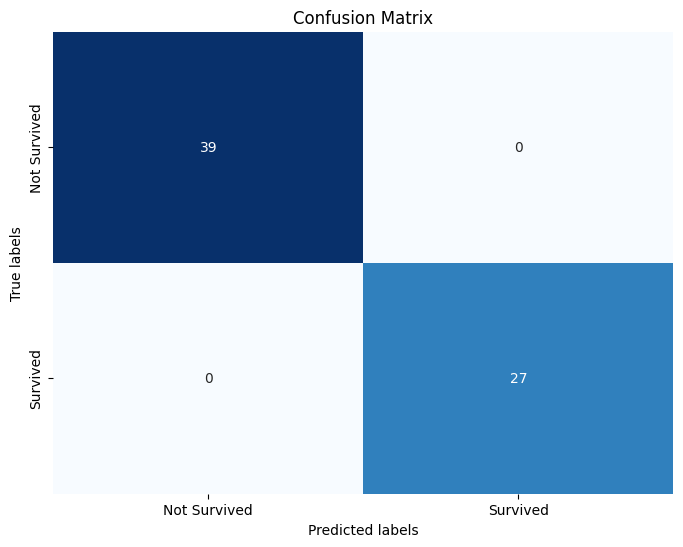

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, y_hat_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Not Survived", "Survived"],
    yticklabels=["Not Survived", "Survived"],
)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

### Visualize the Network Itself

We can see that this neural net is very small and still is able to learn the problem.

Layer   0:                           .  .  .  .  .                          
Layer   1:     .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
Layer   2:                                 .                                


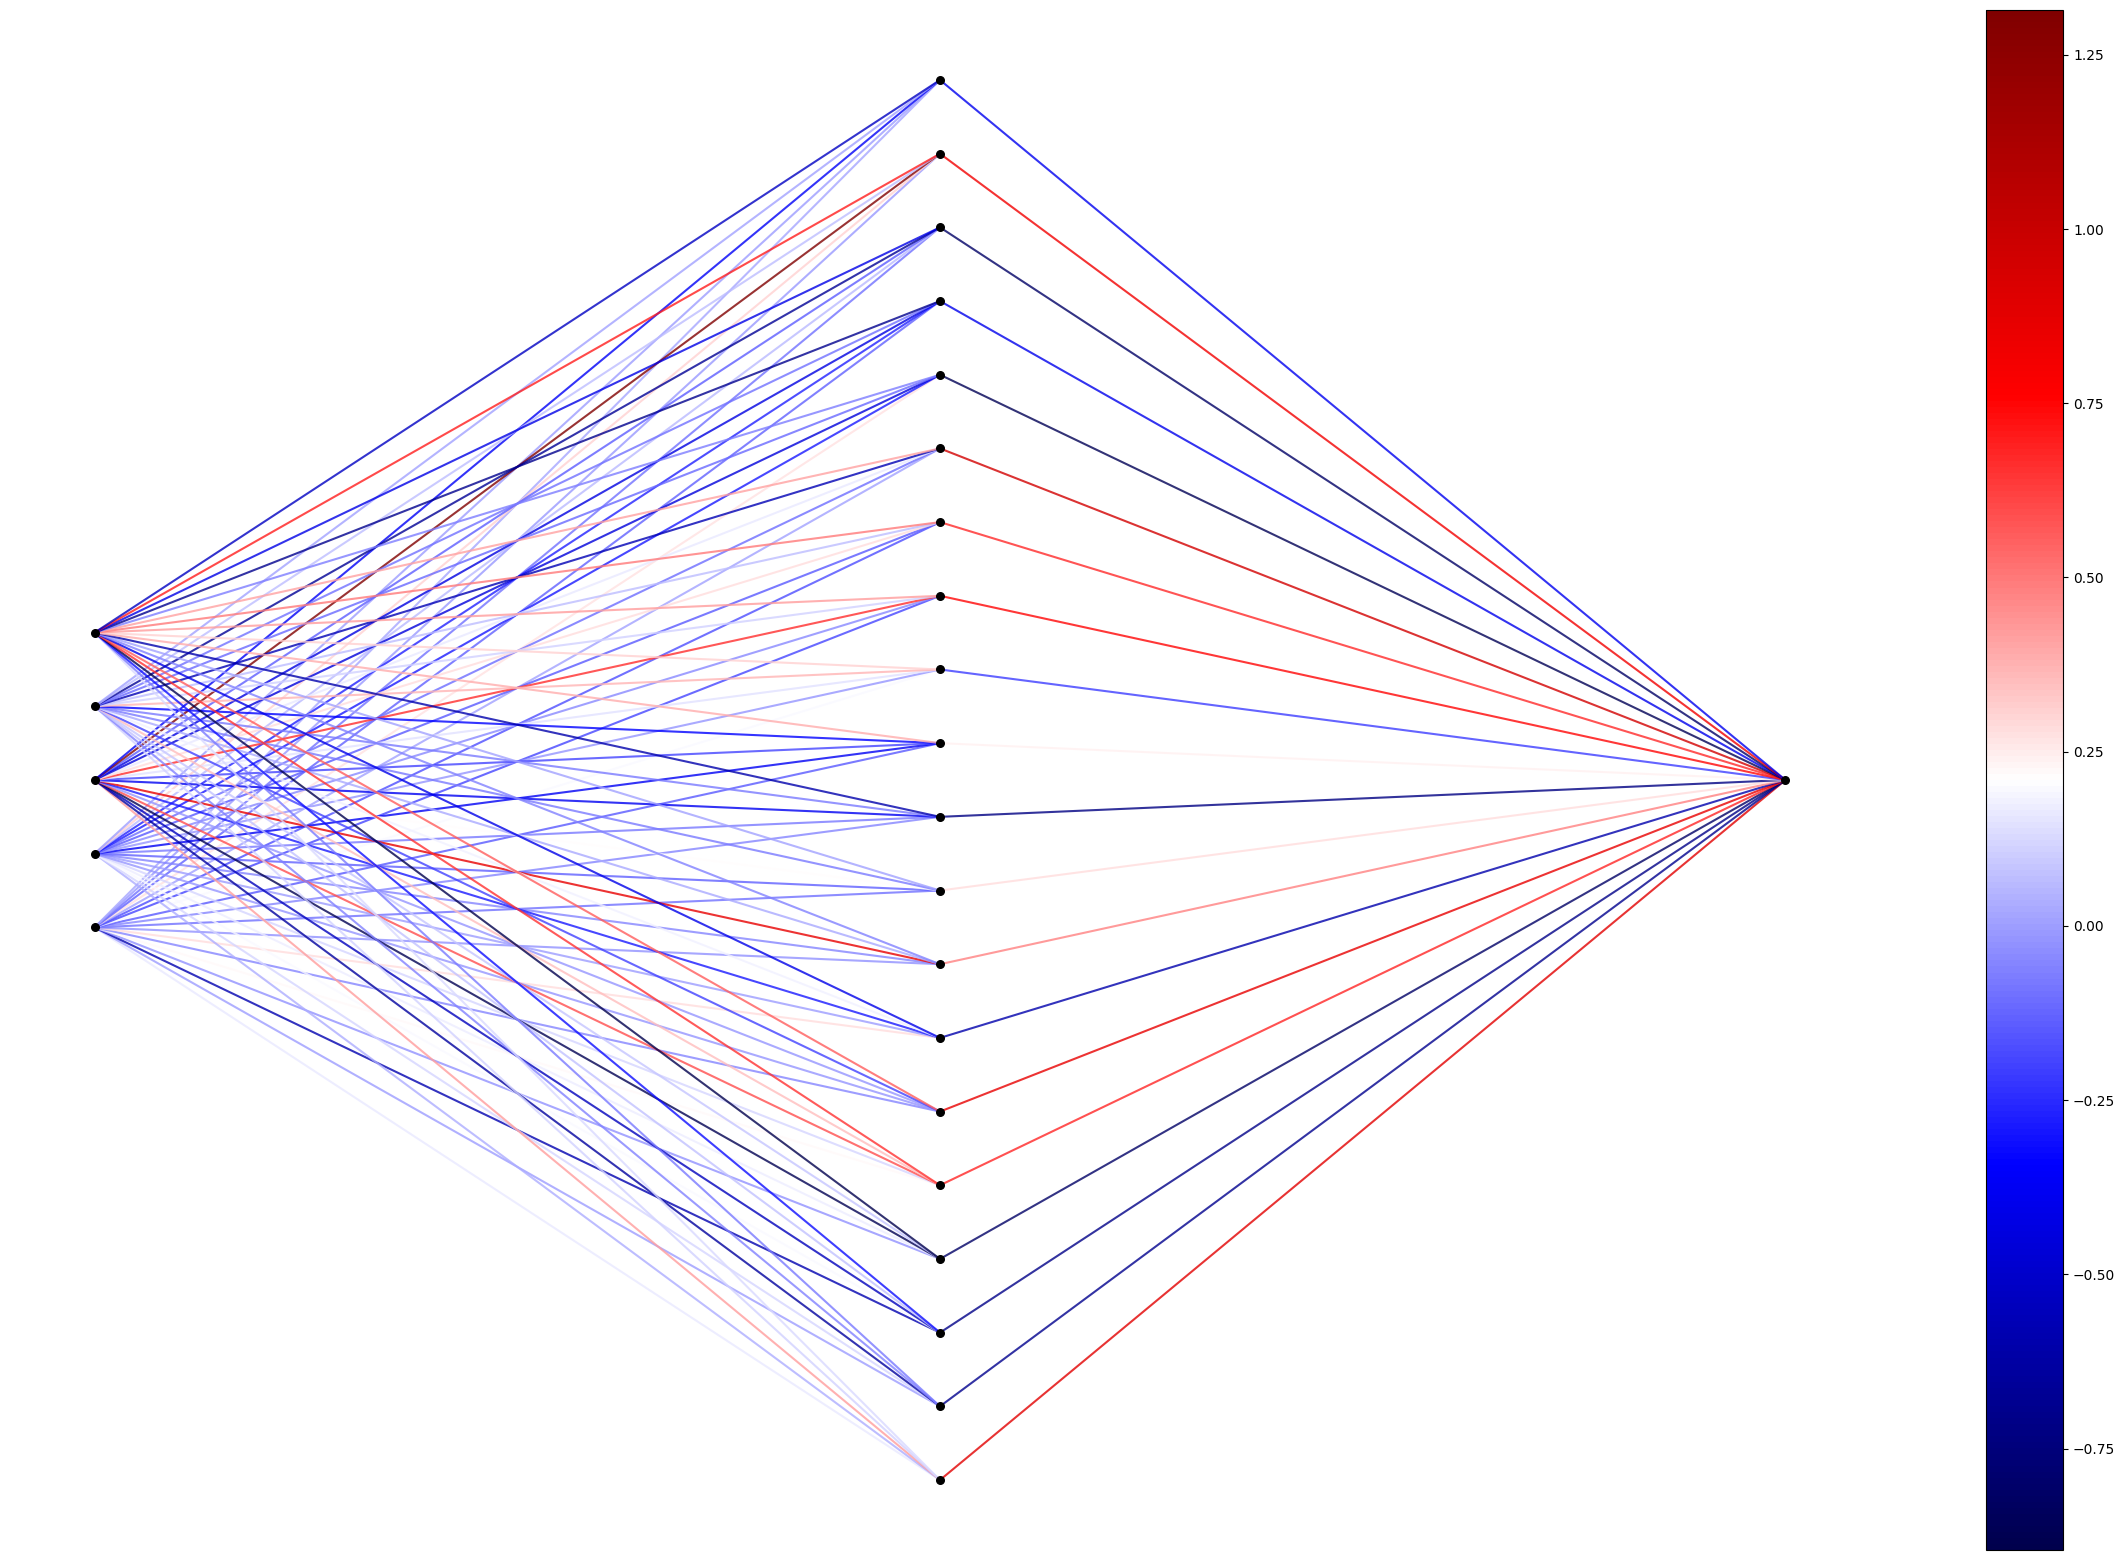

In [7]:
from mlp_visualization import print_ascii_mlp, display_mlp

print_ascii_mlp(mlp)

_ = display_mlp(
    mlp,
    linewidth=1.5,
    neuron_alpha=1,
    neuron_color="black",
    line_alpha=0.8,
    figure_width=30,
    figure_height=20,
    neuron_size=30,
    colormap_name="seismic",
)